In [1]:
library("IRdisplay")


* * *

**Classification And Regression Trees(CART)** is a term introduced by [**Leo Breiman**](https://en.wikipedia.org/wiki/Leo_Breiman) to refer [**Decision Tree algorithm**](https://en.wikipedia.org/wiki/Decision_tree_learning) which is used to predict using classification or regression model.

* * *


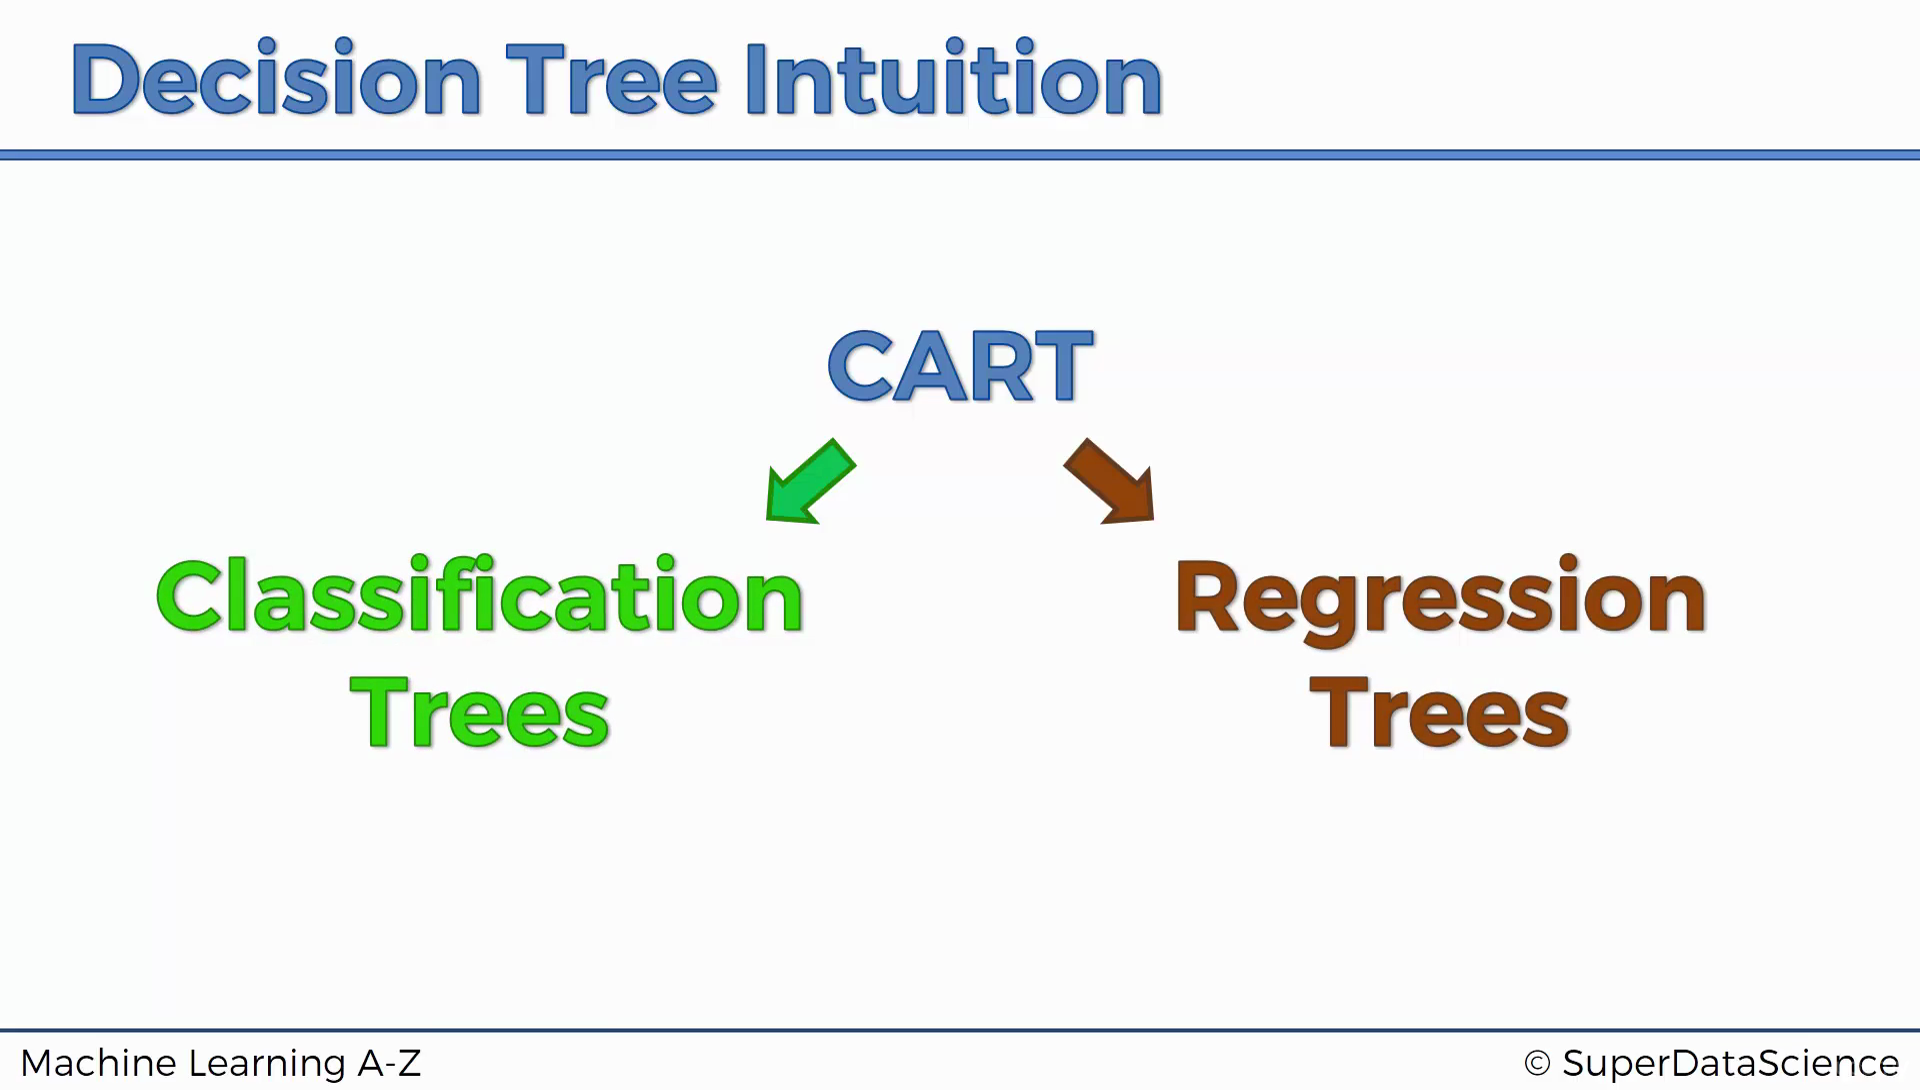

In [2]:
display_png(file="img/01.png")

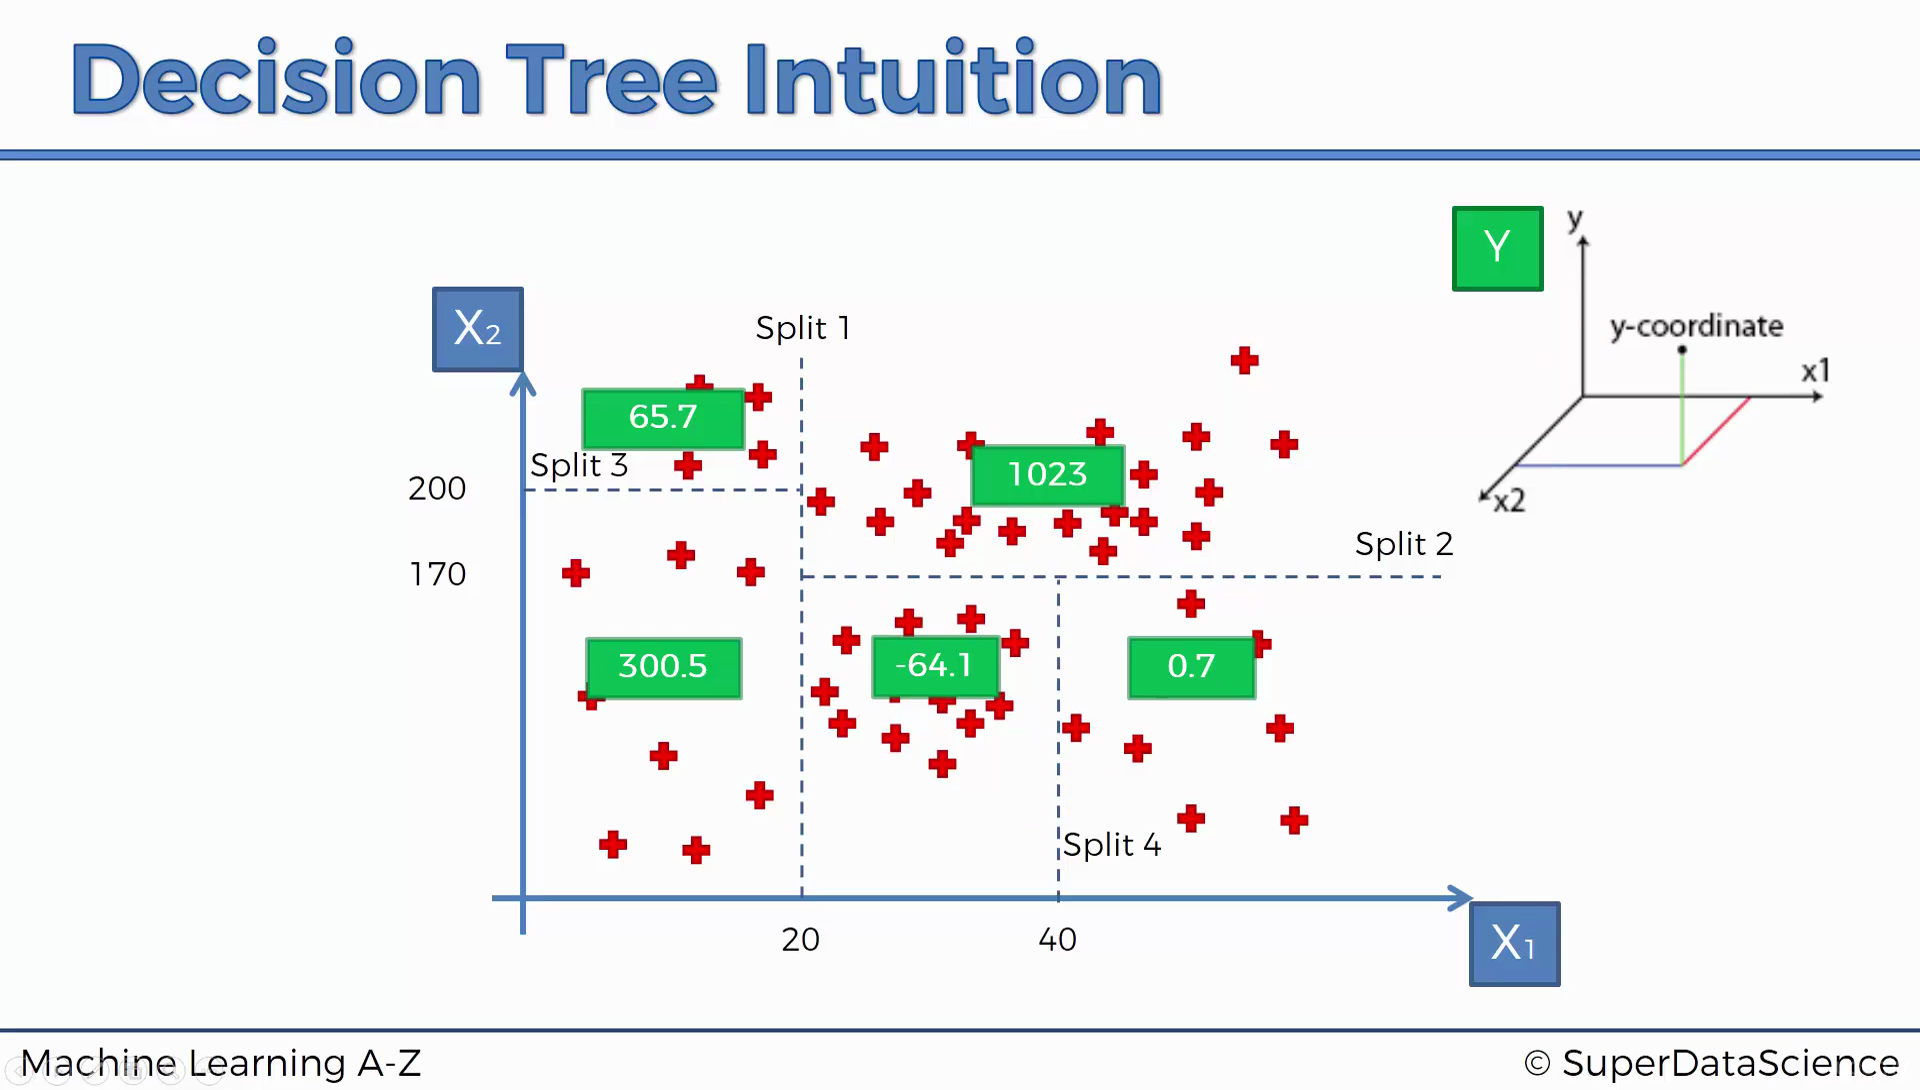

In [3]:
display_png(file="img/02.png")

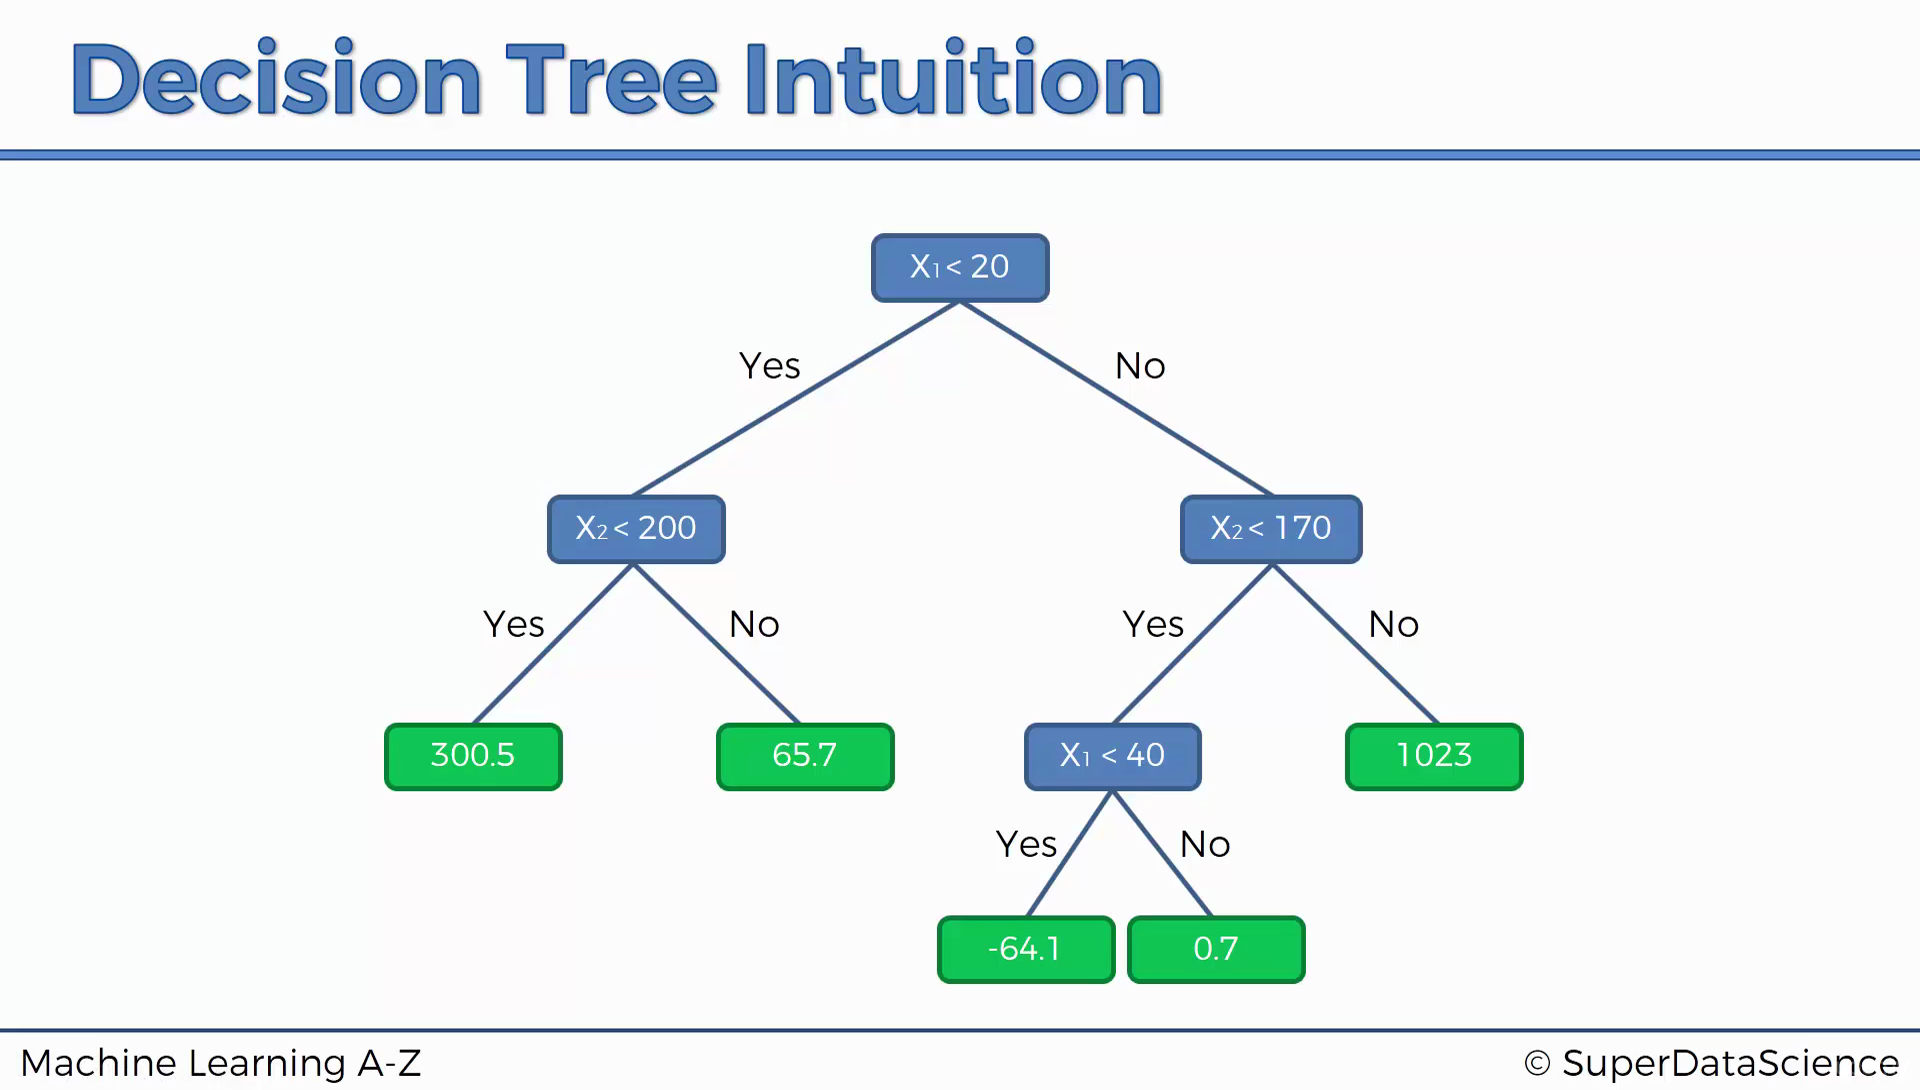

In [4]:
display_png(file="img/03.png")

* * *

The algorithm split the data into several terminal leaves which denotes the average. Above we have two independent variables and one dependent variable. Depending on the value of two new independent variable we can predict the value of dependent variable with a more precise manner rather then the naive approach(where no matter what are the two new dependent variables are we will assign the value of average of all the points to the dependent variable corresponds to the two independent variable).

For exampe let's say we want to predict the dependent variable for two independent variable, X1 = 30, X2 = 100 (say).

*The from the decision tree we can say that Y = -64.1 (as X1 < 20 => No, X2 < 170 => Yes and X1 < 40 = Yes)*

* * *

### Data Preprocessing

In [5]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

In [6]:
dataset

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


### Fitting the Decision Tree Regression Model to the dataset

In [16]:
# install.packages('rpart')
library(rpart)
regressor = rpart(formula = Salary ~ ., 
                  data = dataset, 
                  control = rpart.control(minsplit = 1))

In [17]:
summary(regressor)

Call:
rpart(formula = Salary ~ ., data = dataset, control = rpart.control(minsplit = 1))
  n= 10 

          CP nsplit  rel error   xerror      xstd
1 0.77638626      0 1.00000000 1.234568 0.7835133
2 0.15496716      1 0.22361374 1.481711 0.7808785
3 0.05217357      2 0.06864658 1.481711 0.7808785
4 0.01000000      3 0.01647301 1.481711 0.7808785

Variable importance
Level 
  100 

Node number 1: 10 observations,    complexity param=0.7763863
  mean=249500, MSE=8.066225e+10 
  left son=2 (8 obs) right son=3 (2 obs)
  Primary splits:
      Level < 8.5 to the left,  improve=0.7763863, (0 missing)

Node number 2: 8 observations,    complexity param=0.05217357
  mean=124375, MSE=6.921484e+09 
  left son=4 (6 obs) right son=5 (2 obs)
  Primary splits:
      Level < 6.5 to the left,  improve=0.7600316, (0 missing)

Node number 3: 2 observations,    complexity param=0.1549672
  mean=750000, MSE=6.25e+10 
  left son=6 (1 obs) right son=7 (1 obs)
  Primary splits:
      Level < 9.5 to the left,

### Predicting a new result

In [18]:
y_pred = predict(regressor, data.frame(Level = 6.5))
y_pred

1 
250000

### Visualising the Regression Model results

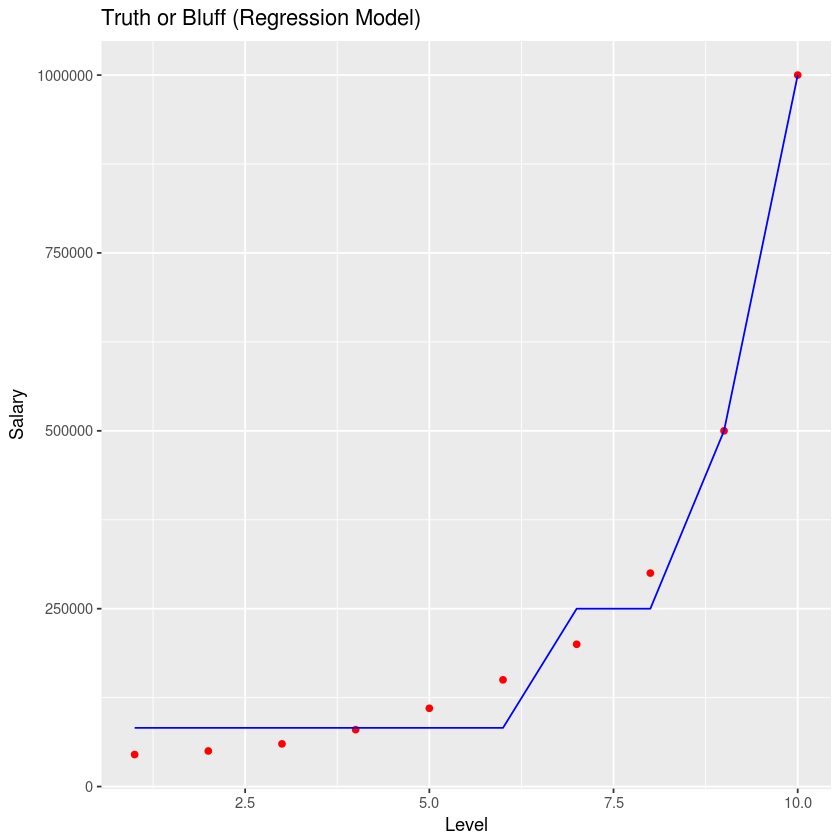

In [19]:
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(regressor, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Regression Model)') +
  xlab('Level') +
  ylab('Salary')

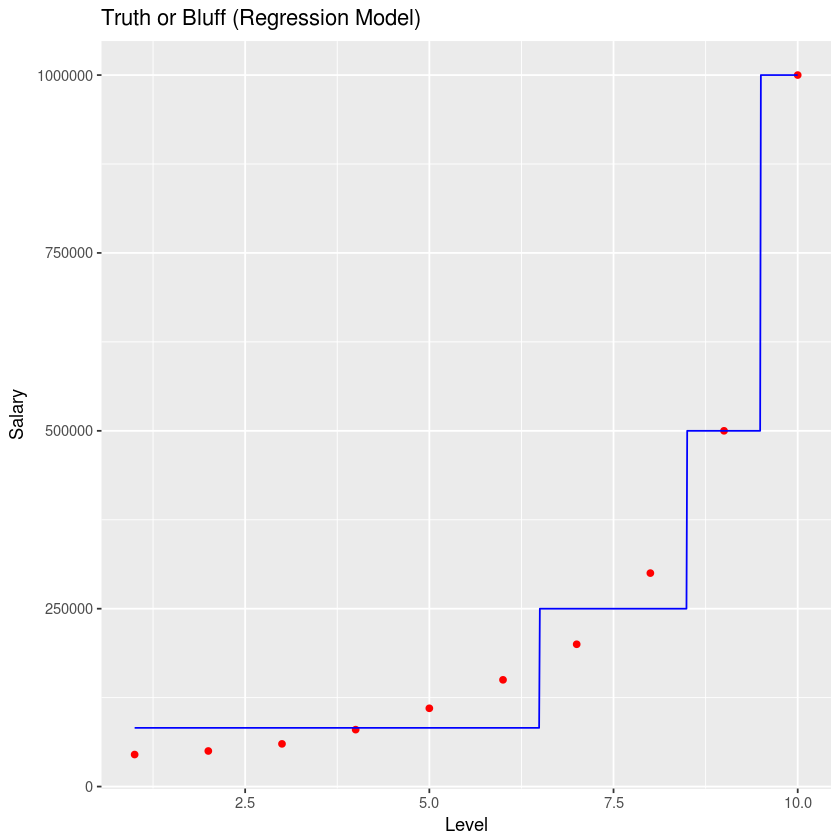

In [21]:
# Visualising the Regression Model results (for higher resolution and smoother curve)
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.01)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Regression Model)') +
  xlab('Level') +
  ylab('Salary')

* * *

From the above graph it is obvious that we are getting an average value for each interval. Also the interval are:

1 to 6.5, 6.5 to 8.5, 8.5 to 9.5, 9.5 to 10.

Value of Salary for level from 6.5 and 8.5 is 250000.

* * *